In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [2]:
IMAGE_SIZE = (128, 128)
NUM_CLASSES = 2 

In [3]:
DATA_DIR = r'C:\Users\geeth\Downloads\test_data\YOLO-Object-Detection\DL project\Data'
DEFECTIVE_DIR = os.path.join(DATA_DIR, 'Defective_cubes')
QUALITY_DIR = os.path.join(DATA_DIR, 'Quality_cubes')

In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [5]:
def load_data(directory):
    images = []
    labels = []
    label = 0 if directory == QUALITY_DIR else 1  # Assign label based on directory
    for filename in os.listdir(directory):
        if filename.lower().endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [6]:
defective_images, defective_labels = load_data(DEFECTIVE_DIR)
quality_images, quality_labels = load_data(QUALITY_DIR)

In [7]:
cube_images = np.concatenate([defective_images, quality_images], axis=0)
cube_labels = np.concatenate([defective_labels, quality_labels], axis=0)

In [8]:
train_images,test_images,train_labels,test_labels=train_test_split(cube_images,cube_labels,test_size=0.2,random_state=42)

In [9]:
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

In [10]:
def precision(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1_score = 2 * (p * r) / (p + r + tf.keras.backend.epsilon())
    return f1_score

In [11]:
# Create CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),             
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid')  # Binary classification
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(datagen.flow(train_images_normalized, train_labels,batch_size=32),  # Pass training data as a tuple
          epochs=10,
          validation_data=(test_images_normalized, test_labels))

Epoch 1/10


112/112 [==============================] - 59s 449ms/step - loss: 0.6924 - accuracy: 0.5292 - precision: 0.4690 - recall: 1.0375 - f1_score: 0.6385 - val_loss: 2.0908 - val_accuracy: 0.5106 - val_precision: 0.4894 - val_recall: 1.0000 - val_f1_score: 0.6529
Epoch 2/10
112/112 [==============================] - 50s 442ms/step - loss: 0.6916 - accuracy: 0.5300 - precision: 0.4697 - recall: 1.0000 - f1_score: 0.6336 - val_loss: 2.2331 - val_accuracy: 0.5106 - val_precision: 0.4894 - val_recall: 1.0000 - val_f1_score: 0.6529
Epoch 3/10
112/112 [==============================] - 50s 446ms/step - loss: 0.6913 - accuracy: 0.5300 - precision: 0.4702 - recall: 1.0000 - f1_score: 0.6343 - val_loss: 2.1290 - val_accuracy: 0.5106 - val_precision: 0.4894 - val_recall: 1.0000 - val_f1_score: 0.6529
Epoch 4/10
112/112 [==============================] - 50s 446ms/step - loss: 0.6916 - accuracy: 0.5300 - precision: 0.4701 - recall: 1.0000 - f1_score: 0.6354 - val_loss: 2.0588 - val_accurac

In [14]:
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(test_images_normalized, test_labels, verbose=0)

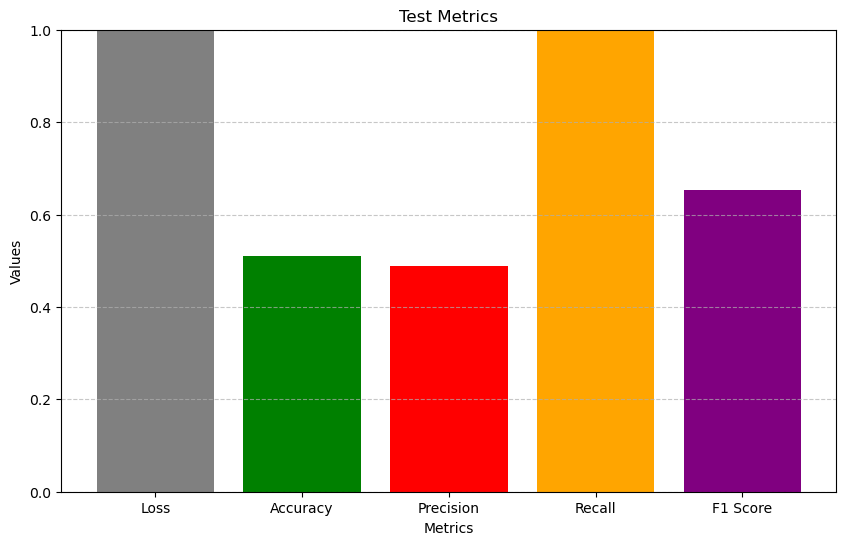

In [15]:
import matplotlib.pyplot as plt

# Define metric names and values
metrics_names = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [test_loss, test_accuracy, test_precision, test_recall, test_f1_score]

# Plot metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['Gray', 'green', 'red', 'orange', 'purple'])
plt.title('Test Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
test_loss, test_accuracy, test_precision, test_recall, test_f1_score 

(1.7904173135757446,
 0.5106145143508911,
 0.48941531777381897,
 1.0,
 0.6528525948524475)